#Problem Statement
In today's volatile stock market, predicting future stock prices is essential for investors. By leveraging
historical data and AI/ML techniques, we can forecast stock prices, giving investors insights that help in
making informed decisions. In this project, we aim to predict the future closing prices of selected stocks
using LSTM, a machine learning model suited for time series data.

#Data Collection & Preprocessing

In [1]:
import yfinance as yf

# Download stock data for Apple
stock_data = yf.download('AAPL', start='2010-01-01', end='2020-12-31')

# Display the first few rows of the data
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454504  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465665  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362819  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351056  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [3]:

print(stock_data.isnull().sum())

# Fill missing data with forward fill

stock_data.fillna(method='ffill', inplace=True)

# Normalize the 'Close' column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

# Split the data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-3-d4a214de8c24>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


#EDA
1. What was the change in stock price over time?
2. What was the daily return on average?
3. What is the correlation between different stocks?
4. What is the moving average of the stock price?

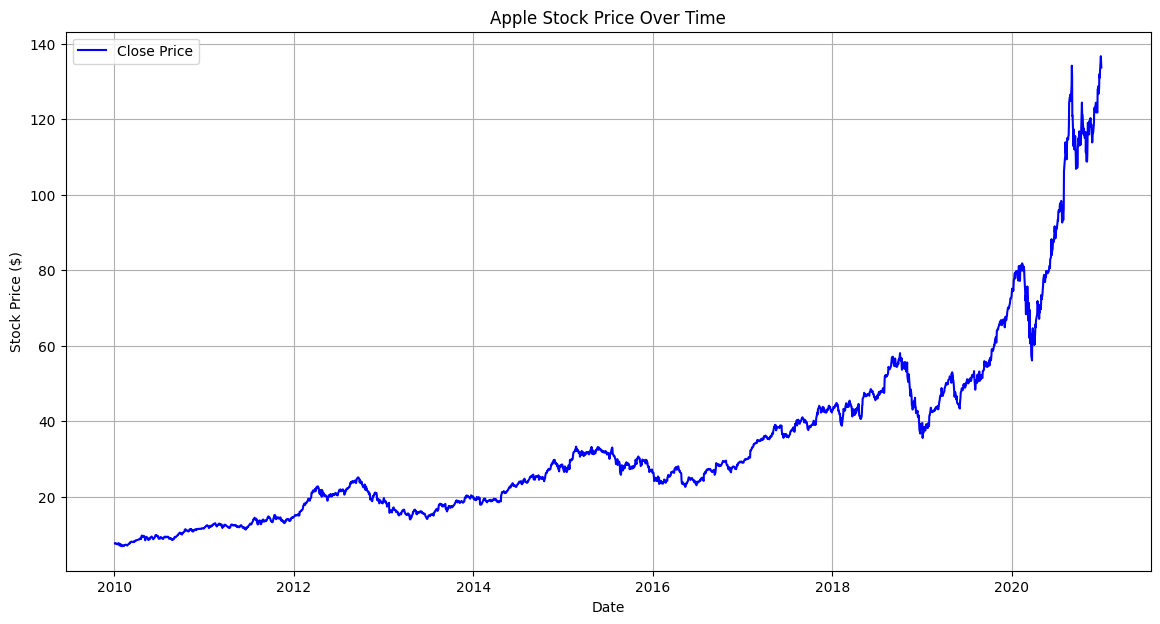

In [4]:
import matplotlib.pyplot as plt

# Plot the stock price over time
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid()
plt.show()


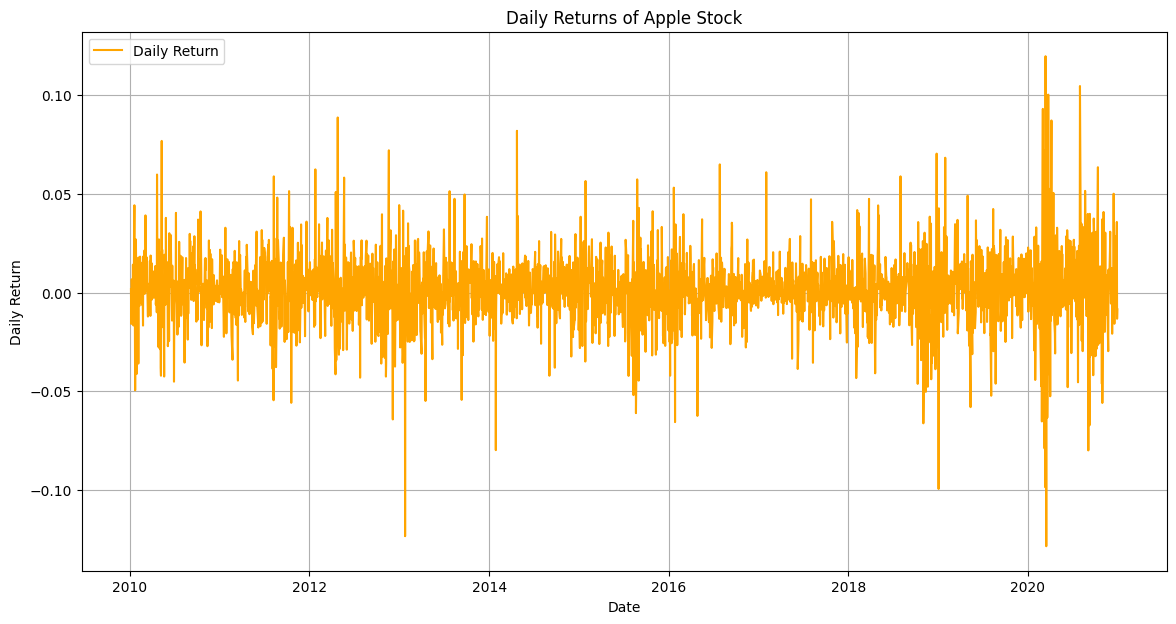

Average Daily Return: 0.0012


In [5]:
# Daily returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Daily Return'], label='Daily Return', color='orange')
plt.title('Daily Returns of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid()
plt.show()

# Average daily return
average_daily_return = stock_data['Daily Return'].mean()
print(f'Average Daily Return: {average_daily_return:.4f}')


[*********************100%***********************]  3 of 3 completed


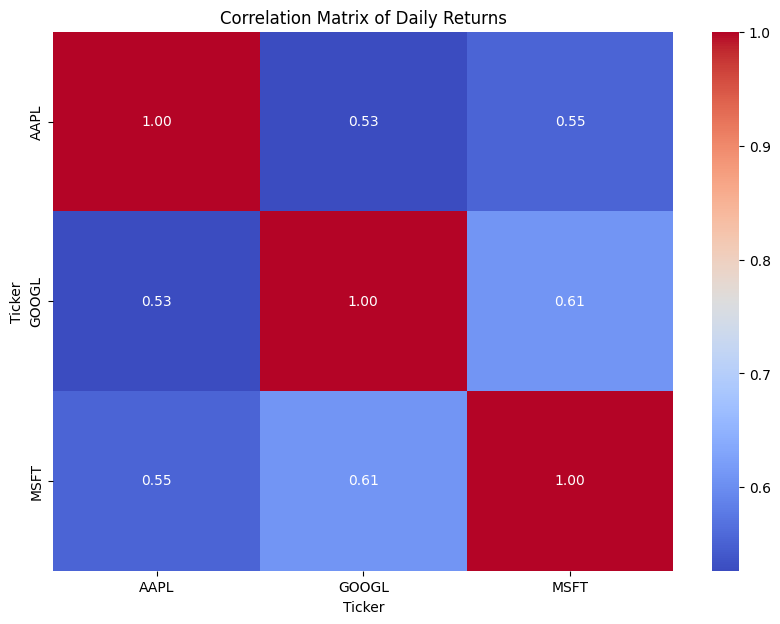

In [6]:
# Download data for multiple stocks
stocks_data = yf.download(['AAPL', 'GOOGL', 'MSFT'], start='2010-01-01', end='2020-12-31')

# Calculate daily returns for all stocks
daily_returns = stocks_data['Close'].pct_change()

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

# Plot the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Returns')
plt.show()


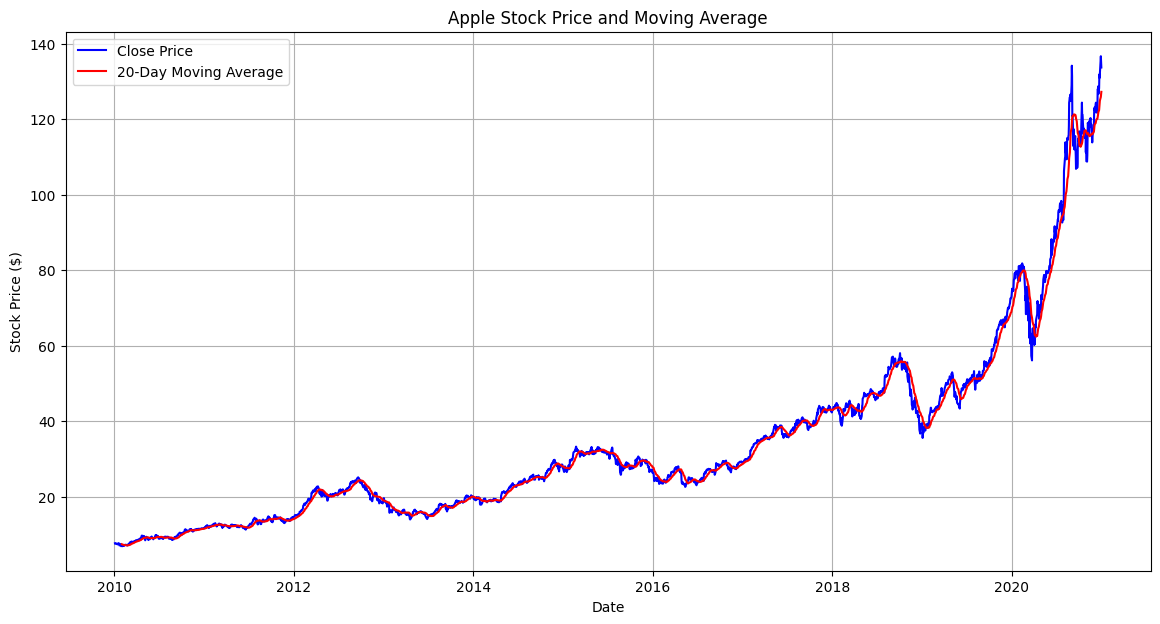

In [7]:
# Calculate moving average
stock_data['Moving Average'] = stock_data['Close'].rolling(window=20).mean()

# Plot closing price and moving average
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['Moving Average'], label='20-Day Moving Average', color='red')
plt.title('Apple Stock Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid()
plt.show()


#Model Building

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Input layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Prediction of the next closing price

model.compile(optimizer='adam', loss='mean_squared_error')



In [13]:
# Reshape the data to fit into the LSTM model
X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)  # Increase epochs for better training


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0054
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 2.7631e-04
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 2.9248e-04
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 2.5368e-04
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 2.2967e-04
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 2.0057e-04
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 2.1560e-04
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 1.7087e-04
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 1.8983e-04
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.6475e-04
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 1.4233e-04
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 1.7322e-04
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.5132e-04
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 1.3642e-04
Epoch 15/50
68/68 ━

In [14]:
# Prepare test data
X_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Rescale to original values


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


#Evaluation & Results

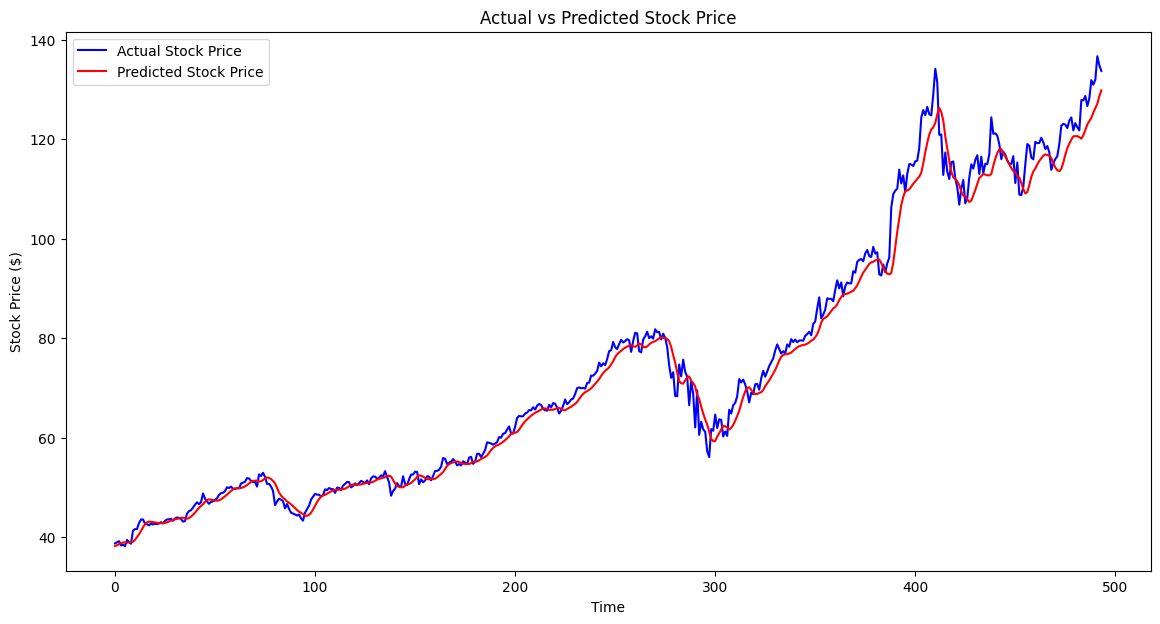

Mean Squared Error: 9.7409


In [15]:
# Visualize predictions vs actual stock prices
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(test_data[60:]), color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()

# Calculate evaluation metrics (Optional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(scaler.inverse_transform(test_data[60:]), predictions)
print(f'Mean Squared Error: {mse:.4f}')


#Conclusion

1. How accurate is the model's prediction?
2. What are the differences between predicted and actual values?

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mse = mean_squared_error(scaler.inverse_transform(test_data[60:]), predictions)
mae = mean_absolute_error(scaler.inverse_transform(test_data[60:]), predictions)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')


Mean Squared Error: 9.7409
Mean Absolute Error: 2.1830


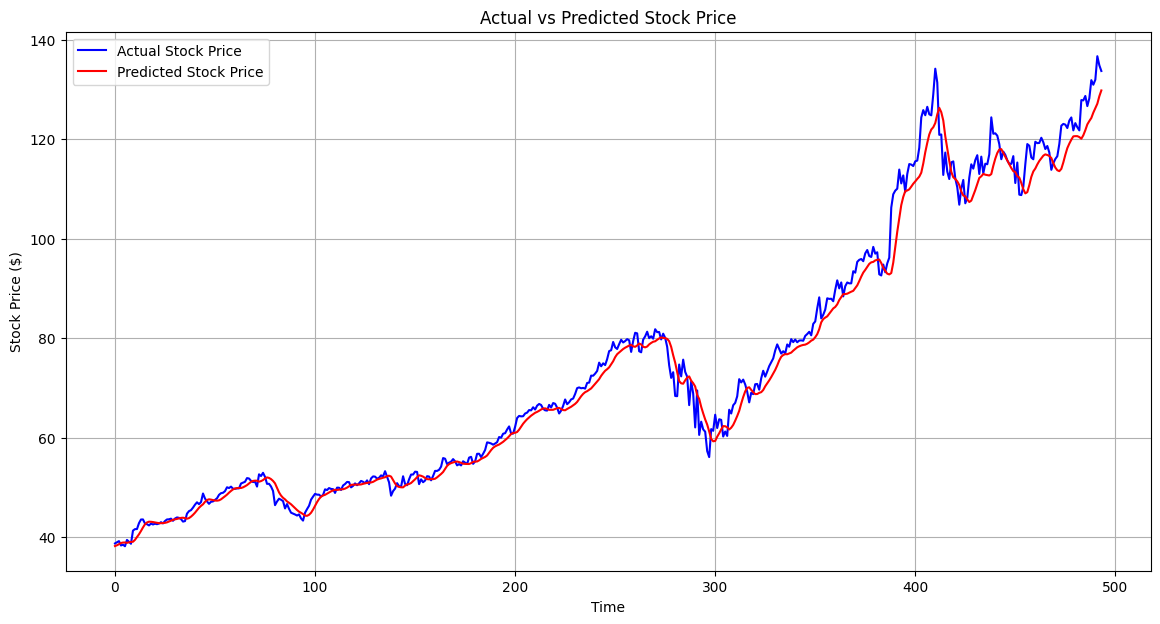

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(test_data[60:]), color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid()
plt.show()


1. What is the value at risk (VaR) over a specific time period?
2. What is the maximum possible loss?

In [19]:
#Value at Risk (VaR) Calculation
# Assuming you have daily returns calculated
daily_returns = stock_data['Daily Return'].dropna()

# Choose a confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate VaR
VaR = daily_returns.quantile(1 - confidence_level)
print(f'Value at Risk (VaR) at {confidence_level*100}% confidence level: {VaR:.4f}')

# Maximum possible loss over a specified time period (e.g., 1 day)
investment_amount = 10000  # Example investment amount
max_loss = investment_amount * VaR
print(f'Maximum Possible Loss for ${investment_amount} investment: ${max_loss:.2f}')


Value at Risk (VaR) at 95.0% confidence level: -0.0260
Maximum Possible Loss for $10000 investment: $-260.03
